# Week4授業前課題1 アヤメを分類しよう

1.この課題の目的
教師あり学習（分類問題）の概観を知る
scikit-laernを使い分類を行えるようにする
手法の簡単な比較をする

2.アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。
アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。

今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。
ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

3.分類問題の流れ
まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。

練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。
こうすることで2次元の散布図を描き確認することができます。
また、問題を単純化するためアヤメの種類を2つだけ使うことにします。
分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。
それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

## 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。
irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。
virgicolorとvirginica
sepal_lengthとpetal_length

In [1]:
import pandas as pd
import numpy as np

# irisデータをインポート
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# 説明変数を定義
dataset_data = iris_dataset.data[:, [0,2]]
df_data = pd.DataFrame(dataset_data)
df_data.columns = ['sepal_length', 'petal_length']

# 目的変数を定義
dataset_target = iris_dataset.target
df_target = pd.DataFrame(dataset_target)
df_target.columns = ['Species']

In [2]:
df = pd.concat([df_data, df_target], axis=1) 

In [3]:
# 目的変数をvirgicolorとvirginicaに絞る
df_practice = df.query('Species == [1, 2]')

## 【問題2】データの分析

まずはデータの分析を行いますが、これはWeek3の課題1で行いました。
その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。
sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

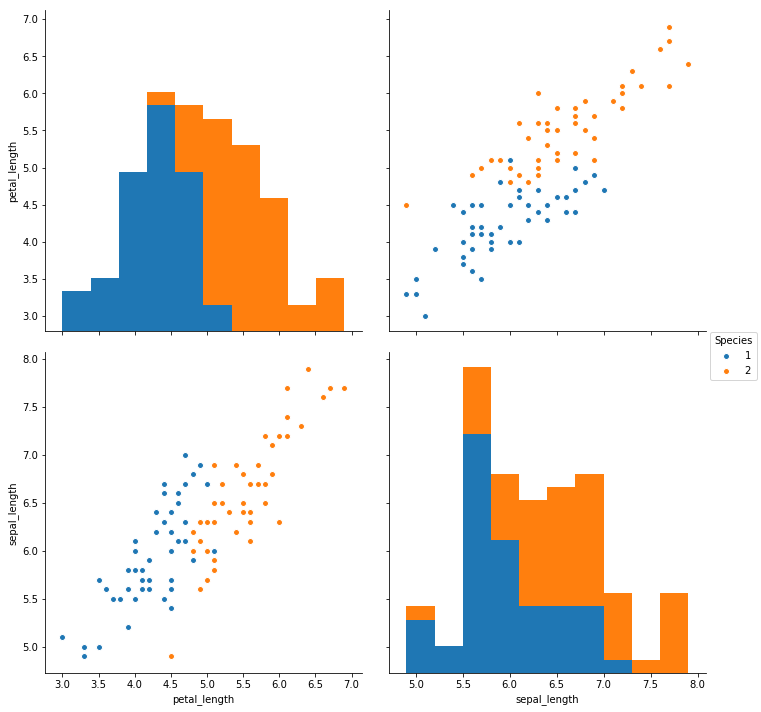

In [5]:
sns.pairplot(df_practice, hue="Species", vars=["petal_length","sepal_length"], size=5)
plt.show()

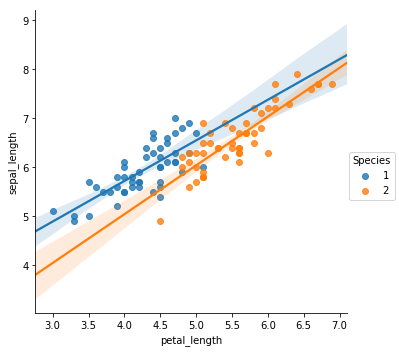

In [6]:
ax=sns.lmplot(x="petal_length", y="sepal_length", hue="Species", data=df_practice)

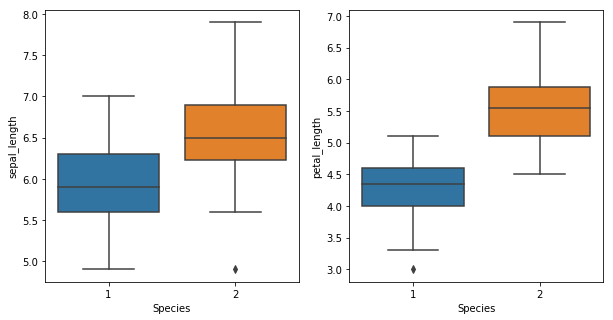

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x="Species", y="sepal_length", data=df_practice)

plt.subplot(1,2,2)
sns.boxplot(x="Species", y="petal_length", data=df_practice)

plt.show()

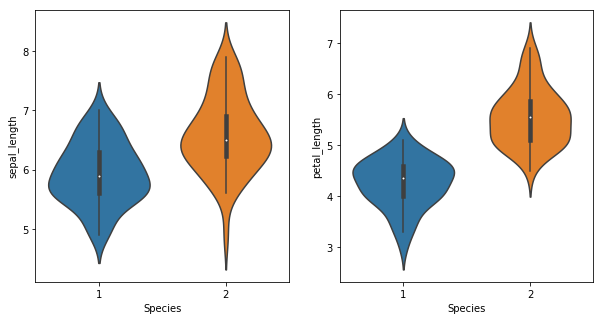

In [8]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.violinplot(x="Species", y="sepal_length", data=df_practice)

plt.subplot(1,2,2)
sns.violinplot(x="Species", y="petal_length", data=df_practice)

plt.show()

## 【問題2】前処理・学習用データと検証用データの分割

前処理の一貫として、学習用（train）データと検証用（validation）データの分割を行います。
今回は学習用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。
公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation

■注意点
データの分析まではPandasのDataFrame型を使用してきました。しかし、scikit-learnはNumPyのndarray型を想定して作られています。
そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

■分割する理由
分類問題の目的は未知のデータを正しく分類することです。
その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。
この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。
学習に使うデータを学習用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

In [9]:
# この段階でndarrayへの変換を行いましょう。
array_practice = df_practice.values

In [10]:
# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。
X = array_practice[:, :2]
y = array_practice[:, 2:3]

In [11]:
from sklearn.model_selection import train_test_split

学習用データ75%、検証用データ25%
学習用（train）データと検証用（validation）

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9 )

## 【問題3】前処理・標準化

分類精度をあげるための加工を行います。
手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.preprocessing.StandardScaler — scikit-learn 0.20.2 documentation

■注意点
標準化は学習用のデータでfitを行い、学習用、検証用双方のデータにtransformを行います。
検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

■実際の問題での前処理は？
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。
分析を行いながら、様々な加工が必要になってきます。
例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。
外れ値の確認や、複数のデータセットの整理などもあります。

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(y_train)
X_train = scaler.transform(X_train)

## 【問題4】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習を行います。
scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。
ここで入力するのは学習用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。
最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。
デフォルトの5、および1と3を最低限行ってください。
5の場合を5-nn、3の場合を3-nnのように呼びます。

In [14]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1) # インスタンス生成。n_neighbors:Kの数
neigh.fit(X_train, y_train)                  # モデル作成=学習
y_pred = neigh.predict(X_test)              # 予測
y_pred

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([ 2.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.])

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3) # インスタンス生成。n_neighbors:Kの数
neigh.fit(X_train, y_train)                  # モデル作成=学習
y_pred = neigh.predict(X_test)              # 予測
y_pred

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [16]:
neigh = KNeighborsClassifier(n_neighbors=5) # インスタンス生成。n_neighbors:Kの数
neigh.fit(X_train, y_train)                  # モデル作成=学習
y_pred = neigh.predict(X_test)              # 予測
y_pred

/Users/Nonna/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## 【問題5】評価

検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。
scikit-learnに用意されていますので、それぞれを計算してください。
また、それぞれの意味について簡単に調査してマークダウンでまとめてください。

sklearn.metrics.accuracy_score — scikit-learn 0.20.2 documentation

sklearn.metrics.precision_score — scikit-learn 0.20.2 documentation

sklearn.metrics.recall_score — scikit-learn 0.20.2 documentation

sklearn.metrics.f1_score — scikit-learn 0.20.2 documentation

precision、recall、f値を計算する背景にはTrue Positive、True Negative、False Positive、False Negativeがあります。
この4種類を計算し表示するものとして混合行列があります。これもscikit-learnを使い表示させてください。

sklearn.metrics.confusion_matrix — scikit-learn 0.20.2 documentation

In [17]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred, normalize=False)/len(y_test)

0.71999999999999997

In [18]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)/len(y_test)

0.028333333333333335

In [19]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)/len(y_test)

0.040000000000000001

In [20]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)/len(y_test)

0.033170731707317075

## 【問題6】可視化

評価の一貫として可視化を行います。
今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。
どう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。
可能であればより見やすく改良も行いましょう。

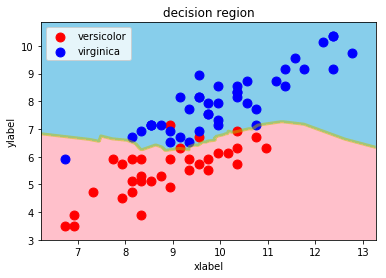

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
y_train = y_train.flatten()
decision_region(X_train, y_train, neigh)

■何をプロットするか
この例では学習データをプロットしたことでどのように学習したかを見ることができます。
一方で、検証用データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。
また、両方合わせてプロットすることも可能です。いろいろと見てみるのが良いでしょう。

手法の改善
実際の問題では指標値や可視化を元に手法を改善していきますが、ここでは扱いません。

## 【問題7】他の手法の学習

以下の全ての手法について学習・推定・評価・可視化を行ってください。
そして、指標値を１つの表にまとめてください。
その表と決定領域を利用して結果を簡単に考察してください。
どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。

最近傍法
ロジスティック回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。
本来はそれぞれパラメータをチューニングするべきですが、まずはデフォルトで実行しましょう。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2 documentation
sklearn.svm.SVC — scikit-learn 0.20.2 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.2 documentation


### ■最近傍法

In [22]:
from sklearn.neighbors import KNeighborsClassifier    # インスタンス生成。n_neighbors:Kの数
neigh = KNeighborsClassifier(n_neighbors=3)    # モデル作成=学習
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)    # 予測
y_pred

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [23]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.71999999999999997

In [24]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.70833333333333337

In [25]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [26]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.82926829268292679

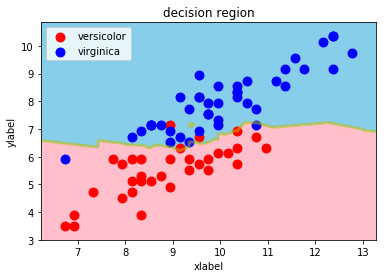

In [27]:
decision_region(X_train, y_train, neigh)

### ■ロジスティック回帰

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)    # 予測
y_pred

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [29]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.71999999999999997

In [30]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.70833333333333337

In [31]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [32]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.82926829268292679

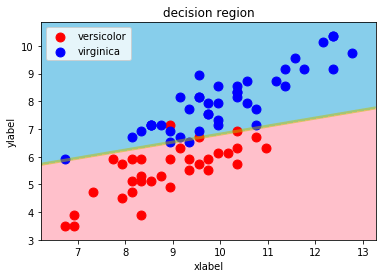

In [33]:
decision_region(X_train, y_train, clf)

### ■SVM

In [34]:
from sklearn.svm import SVC
clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train, y_train) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
y_pred = clf_svc.predict(X_test) 
y_pred 

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.])

In [35]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83999999999999997

In [36]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.84210526315789469

In [37]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.94117647058823528

In [38]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.88888888888888884

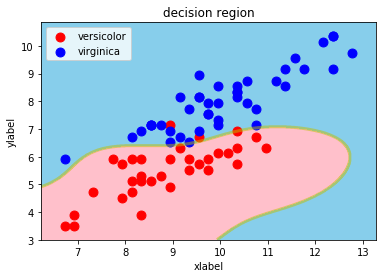

In [39]:
decision_region(X_train, y_train, clf_svc)

### ■決定木

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state=0)
cross_val_score(clf_dtc, X_train, y_train, cv=10)
clf_dtc.fit(X_train, y_train)
y_pred = clf_dtc.predict(X_test) 
y_pred

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.])

In [41]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83999999999999997

In [42]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.88235294117647056

In [43]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.88235294117647056

In [44]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.88235294117647056

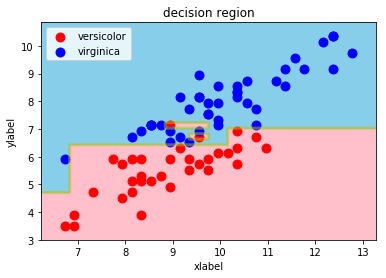

In [45]:
decision_region(X_train, y_train, clf_dtc)

### ■ランダムフォレスト

In [46]:
X_train.shape, y_train.shape,X_test.shape

((75, 2), (75,), (25, 2))

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)
y_pred = clf_rfc.predict(X_test) 
y_pred 

array([ 1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [48]:
#accuracy_正解率：正や負と予測したデータのうち、実際にそうであるものの割合
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.71999999999999997

In [49]:
# precision_適合率：正と予測したデータのうち、実際に正であるものの割合
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.70833333333333337

In [50]:
# recall_再現率：実際に正であるもののうち、正であると予測されたものの割合
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [51]:
#F-measure_F値:精度と再現率の調和平均
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.82926829268292679

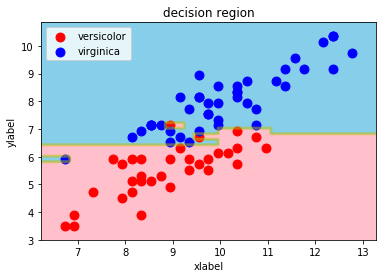

In [52]:
decision_region(X_train, y_train, clf_rfc)

### 指標値を１つの表にまとめてください。 


|  | accuracy | precision |　recall | F-measure |
|:---------|:---------|:---------|:---------|:---------|
| 最近傍法　| 72.0 | 70.8 |　100.0 | 83.0 |
| ロジスティック回帰　| 72.0 | 70.8 |　100.0 | 83.0 |
| SVM　| 84.0 | 70.8 |　100.0 | 83.0 |
| 決定木　| 82.0 | 70.8 |　100.0 | 83.0 |
| ランダムフォレスト　| 72.0 | 70.8 |　100.0 | 83.0 |


### その表と決定領域を利用して結果を簡単に考察してください。

In [ ]:
・versicolorよりvirginicaの方ががくも花びらも長い

### どの手法がどの指標値が良かったかや、どういった決定領域になっていたかを述べてください。

・ロジスティック回帰は傾向を掴みやすいが、一直線で分類するので誤ったグループに分類されることが多くなりがちなため正解率が劣る
・SVMは特徴量の分布が混ざっていない部分については正確に分類できる
・１００個しか特徴量が無いと、random_stateの値を変更すると結果に１０％以上変化したりする

## 【問題8】（アドバンス課題）各パラメータの意味

In [ ]:
手法のパラメータはデフォルトとしましたが、実際に利用する上ではデフォルトは必ずしも良い設定ではありません。
それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

実際の問題では？

パラメータチューニングと呼ばれる作業で、これにはグリッドサーチなどの方法が存在します。
機械学習の上で重要な概念ですので、後々しっかりと扱うことになります。


## 【問題8】（アドバンス課題）標準化の有無の比較

In [ ]:
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。
各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。
考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。


## 【問題9】（アドバンス課題）全ての目的変数を使用して精度が高い手法

In [ ]:
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。
学習と推定、評価を行って、最も精度の高い手法を探してください。

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは意識せず動作させることができます。
しかし、指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要があります。
マイクロ平均やマクロ平均という考え方を使いますので、これについて調査して説明をまとめましょう。

また、決定領域を可視化する場合は前述の関数を適切に書き換える必要があります。
以下が出力例です。